In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline



In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history


C:\Users\Marie\AppData\Local\Temp\ipykernel_12620\3584012099.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [15]:
# Rename Column
sp500_daily_returns.rename(columns = {"Close":"daily_returns"}, inplace = True)


NameError: name 'sp500_daily_returns' is not defined

In [ ]:
# # Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns. 
# Concatenate all DataFrames into a single DataFrame
df_daily = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")


In [ ]:
# Plot daily returns
df_daily.plot(figsize = (20,10))


In [ ]:
#Calculate Cumulative Returns for all portfolios



<Axes: xlabel='Date'>

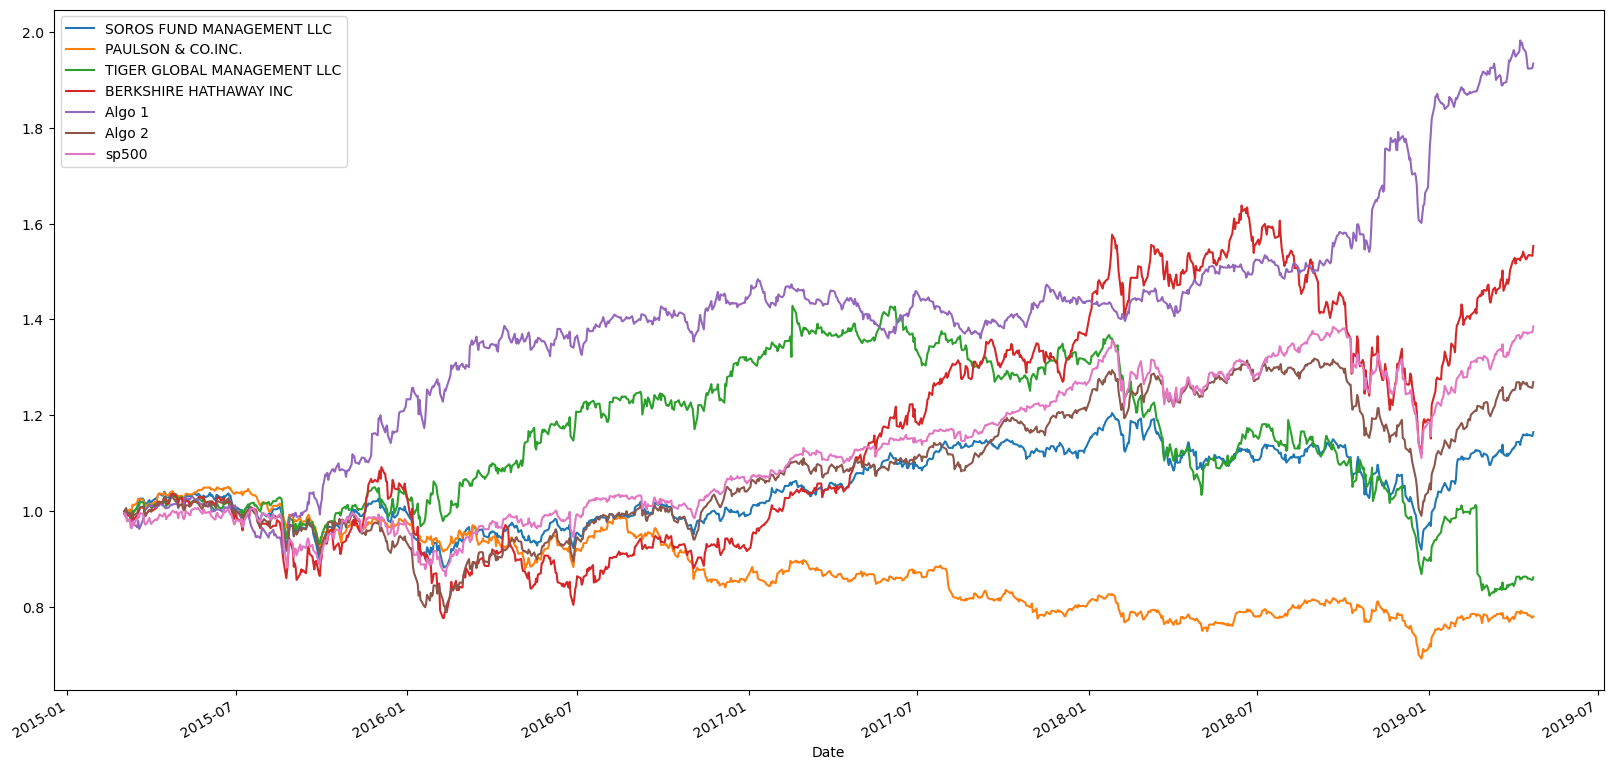

In [16]:
# Plot cumulative returns
df_cum = (1+ df_daily).cumprod()
df_cum.plot(figsize = (20,10))


<Axes: >

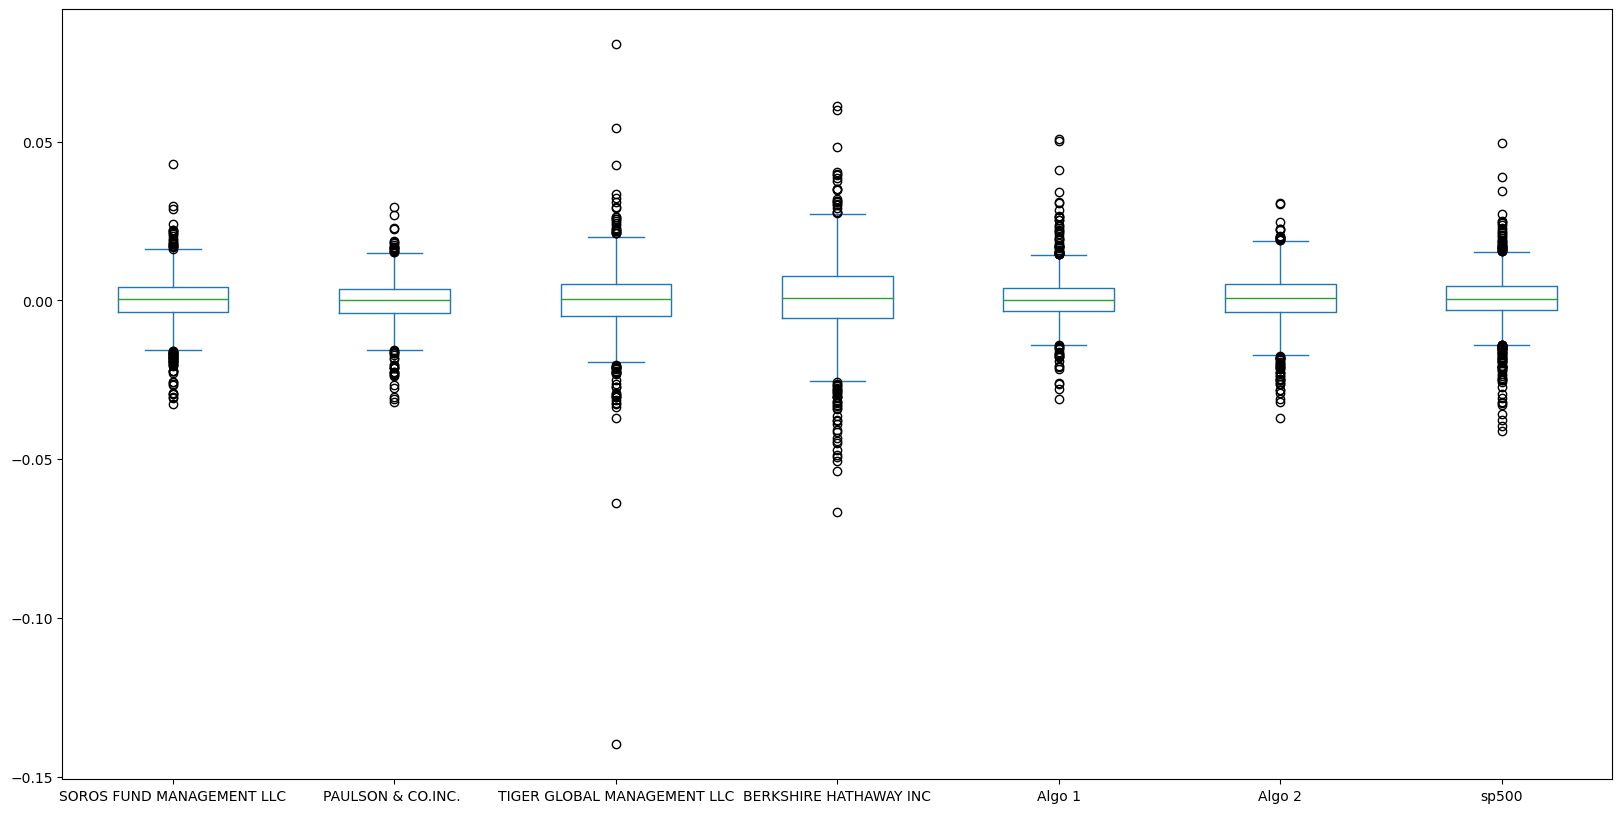

In [17]:
# Box plot to visually show risk
df_daily.plot(kind = "box", figsize = (20,10))


In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
df_daily_std = pd.DataFrame(df_daily.std()).rename(columns = {0:"std"})
df_daily_std


,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


In [19]:
# Determine which portfolios are riskier than the S&P 500
higher_std = df_daily_std[df_daily_std["std"] > df_daily_std.loc["sp500", "std"]]
higher_std


,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [20]:
# Calculate the annualized standard deviation (252 trading days)
df_annualized_std = df_daily_std*np.sqrt(252)
df_annualized_std


,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


<Axes: xlabel='Date'>

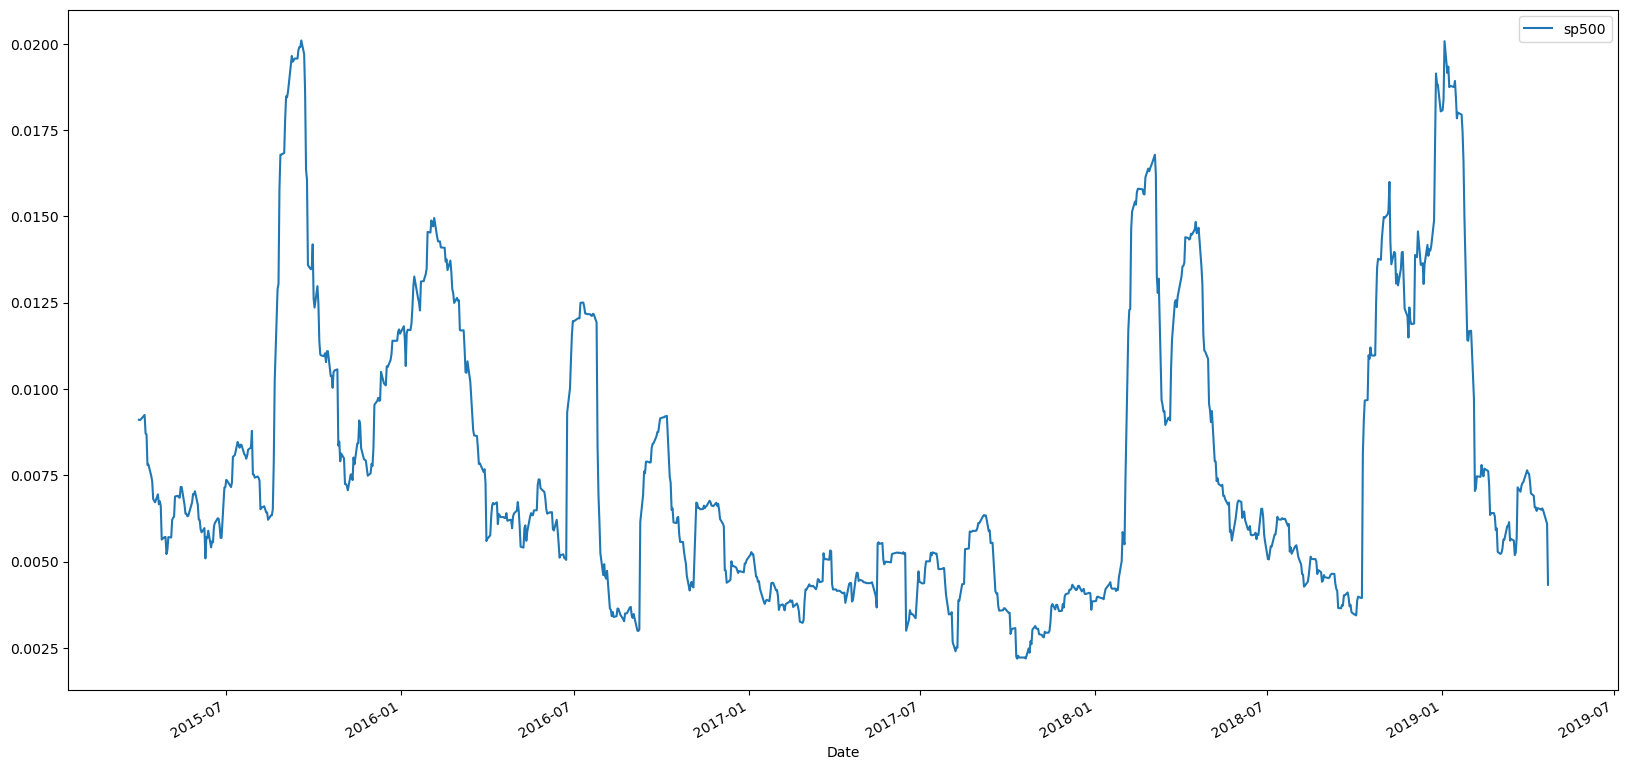

In [21]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_rolling_21 = df_daily[["sp500"]].rolling(window = 21).std()
sp500_rolling_21.plot(figsize = (20,10))


In [5]:
# Correlation calculation

correlation_sp500 = pd.DataFrame df_daily.corr()).loc[:,"sp500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

SyntaxError: unmatched ')' (546634481.py, line 3)

In [ ]:
df_daily.plot(kind="scatter", y = "Algo 2", x = "sp500", figsize = (20,10))
